# Two visualizations of the unclustered data


Hierachical needs distances
Distance of Df, and Ds of the KS algorithm, either sepperatly or combine them somehow (addition?)

In [11]:
import numpy as np
import os
%matplotlib inline 
from matplotlib import pyplot as plt  

# Functions for easier folder access

In [24]:
dirName = '/home/ronald/Desktop/P5-Clustering/GygiAnalysis/'
def getData(folderName):
    npzfilename=os.path.join(dirName + folderName,'rawFeatures.npz')
    dataRaw= np.load(npzfilename) 
    dataRaw=dataRaw['arr_0'].item()
    #dataraw.keys()
    return dataRaw

def compareData(nameFirst, nameSecond, attribute):
    arrayFirst = getData(nameFirst)[attribute]
    arraySecond = getData(nameSecond)[attribute]
    ks, p = stats.ks_2samp(arrayFirst.ravel(), arraySecond.ravel())
    return ks

def getDirList(inputBool):
    exclude = ['GygiDataAnalysis_PT', 'GygiDataAnalysis_TN', 'GygiDataAnalysis_PN', 'GygiDataAnalysis2DManual', '.ipynb_checkpoints']
    dirList = []
    for name in os.listdir(dirName):
        if os.path.isdir(os.path.join(dirName, name)):
            if name not in exclude:
#                 print name
                dirList.append(name)
    dirList.sort()
    if inputBool:
        return dirList[0:10]
    else:
        return dirList

# Visualizations

<font color='red'> ERON: Please introduce what you will doing before you show it. </font>

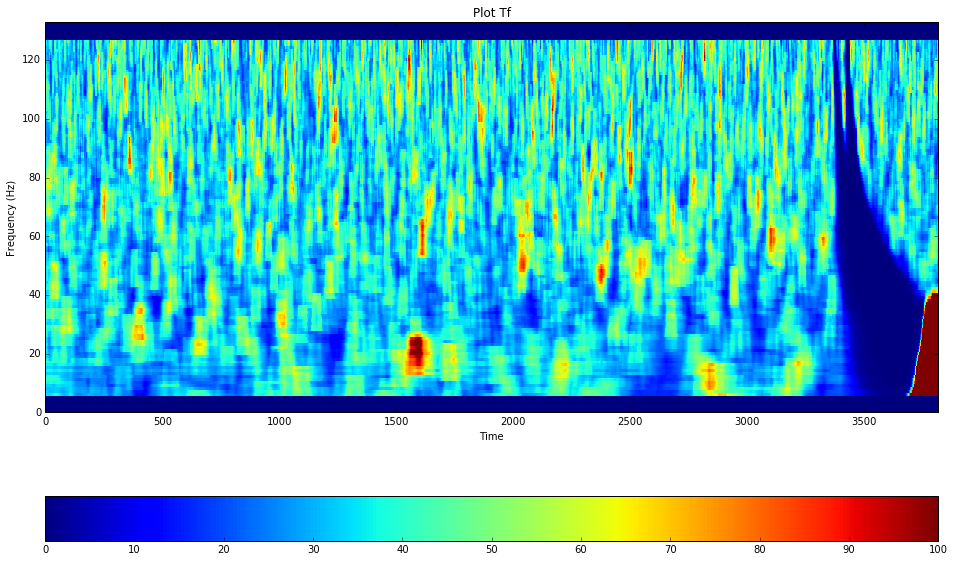

(133, 3816)


1240.2607913994066

In [30]:
array = getData('gun')
array = array['Tf']

fig = plt.figure(figsize=(16,10,))
ax = fig.add_subplot(1,1,1)
img = ax.imshow(array, interpolation='nearest',aspect='auto', vmin = 0, vmax=100)
plt.title('Plot Tf')
plt.xlabel('Time')
plt.ylabel('Frequency (Hz)')
plt.colorbar(img, orientation='horizontal')
plt.ylim(0, 133) #Flipping Y so that 0 is at the bottom
plt.show()

#tijd is X, freq is Y, color is intensity van 0 tot 100 dB²
print array.shape
array[20][3800]

<font color='red'> ERON: Caption needed. Explain what you see. </font>

Example Caption: The figure above shows the tract feature for a recording from a gunshot sound. The actual gunshot is at the beginning of the file and is not very visible in this representation. This despite the feature being designed for detecting pulses.

Questions: Why did you pick the gun example? What does it illustrate compared to the other possible sounds? I think drumsa or footstp give much nicer examples of this feature. Showing it actually works in the absence of reverberation.


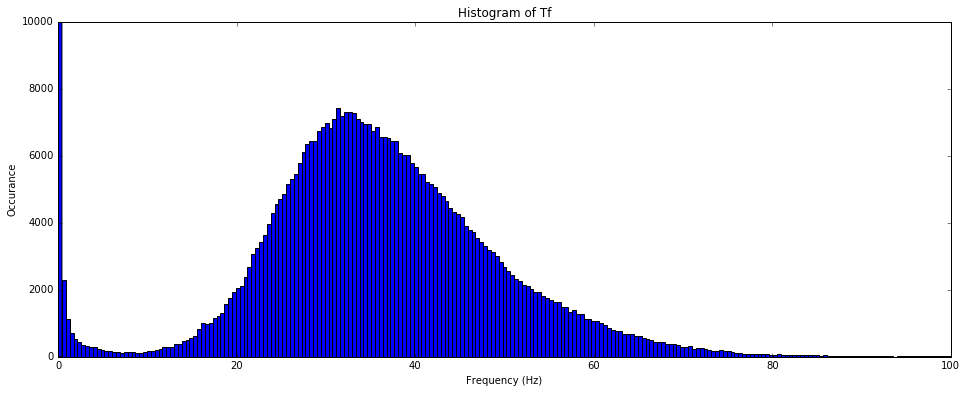

In [14]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(16,6,))
ax = fig.add_subplot(1,1,1)
plt.hist(array.ravel(), bins='auto', range=(0, 100))#Ravel makes a 1D array from a 2D, {{1,2}, {3,4}} = {1,2,3,4}
plt.title('Histogram of Tf')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Occurance')
plt.ylim(0, 10000)
plt.show()


<font color='red'>  Caption? What do you want to show with this graph? </font>

# Analyzing data

According to Elburg, we should open each files "Tf, Ts, E" and compare those files with the probability distance

from scipy import stats
from IPython.display import clear_output

dirList = getDirList(False)
maxSize = len(dirList)
outputArray = np.zeros((maxSize, maxSize))
# outputArray.shape

for i, dir1 in enumerate(dirList):
    # the [i::] of the upper triangle could work, but then the index "j" doenst represent the correct value, therefore i+j
    for  j, dir2 in enumerate(dirList[i::]):
        outputArray[i][j+i] = compareData(dir1,dir2,'Tf')
        outputArray[j+i][i] = outputArray[i][j+i]
        clear_output()
        print 'dir1: ' + str(i) + '\tdir2: '+ str(j+i)


In [31]:
from scipy.cluster.hierarchy import dendrogram, linkage
import scipy.spatial.distance as ssd

#Saving the data
#np.savez_compressed('dataArray.npz', outputArray)

In [33]:
npzfilename=os.path.join(os.path.basename('.'),'dataArray.npz')
dataRaw = np.load(npzfilename) 
dataRaw=dataRaw['arr_0']
#dataRaw.shape

(100, 100)


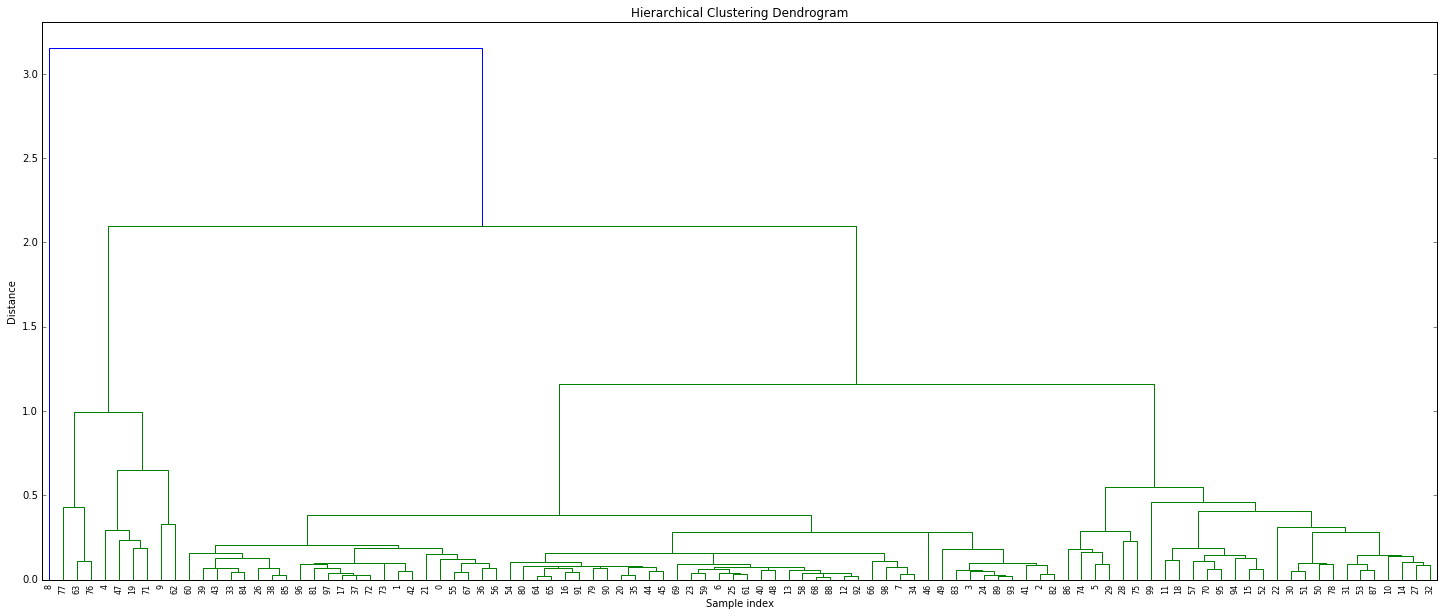

In [34]:
X = dataRaw
print X.shape
Z = linkage(X,'median')

plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample index')
plt.ylabel('Distance')
dendrogram(
    Z,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()

<font color='red'>  ERON: Captions and text lacking! </font>

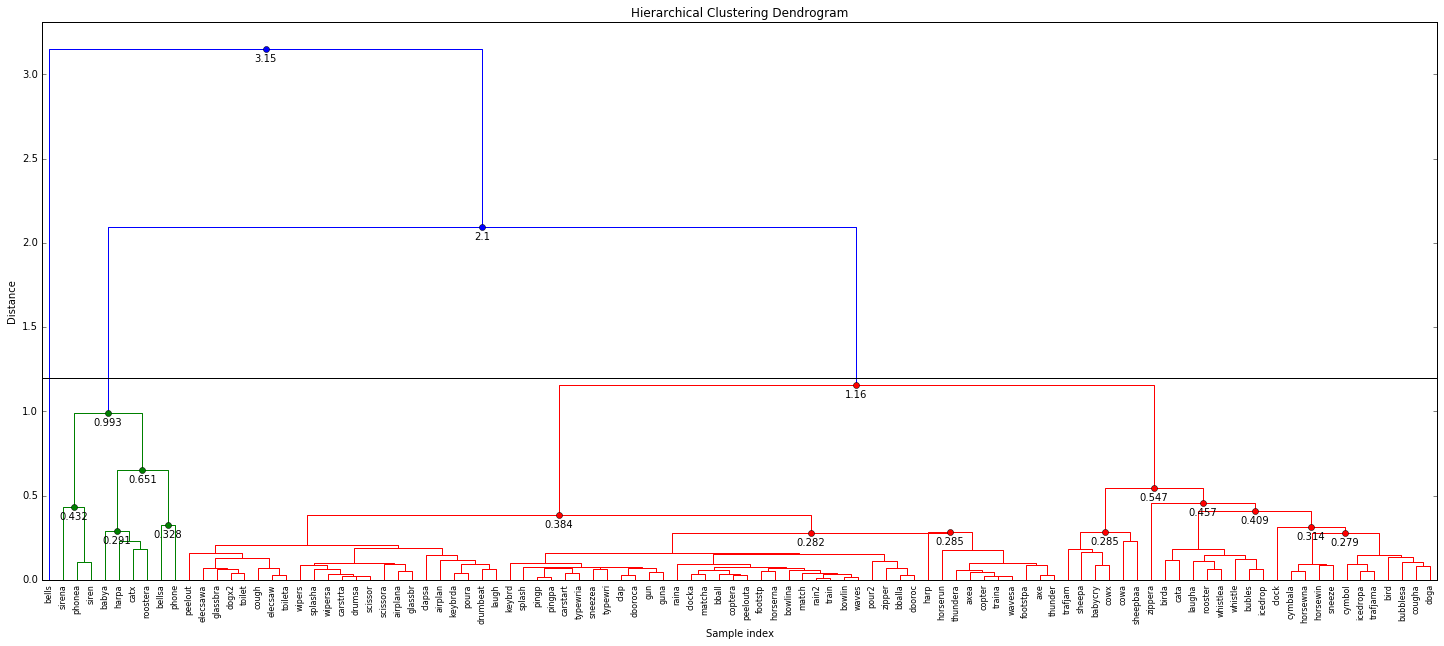

In [18]:
def dendrogram2(*args, **kwargs):
    max_d = kwargs.pop('max_d', None)
    if max_d and 'color_threshold' not in kwargs:
        kwargs['color_threshold'] = max_d
    annotate_above = kwargs.pop('annotate_above', 0)
    
    ddata = dendrogram(*args, **kwargs)
    
    if not kwargs.get('no_plot', False):
        plt.title('Hierarchical Clustering Dendrogram')
        plt.xlabel('Sample index')
        plt.ylabel('Distance')
        for i, d, c in zip(ddata['icoord'], ddata['dcoord'], ddata['color_list']):
            x = 0.5 * sum(i[1:3])
            y = d[1]
            if y > annotate_above:
                plt.plot(x, y, 'o', c=c)
                plt.annotate("%.3g" % y, (x, y), xytext=(0, -5),
                             textcoords='offset points',
                             va='top', ha='center')
        if max_d:
            plt.axhline(y=max_d, c='k')
    return ddata
plt.figure(figsize=(25, 10))

dendrogram2(
    Z,
    truncate_mode='lastp',
    p=100,
    show_leaf_counts=False,
    leaf_rotation=90,
    leaf_font_size=8,
    show_contracted=True,
    annotate_above=0.25,
    max_d=1.2,
    labels = getDirList(False)
)
plt.show()

<font color='red'>  ERON: Captions and text lacking! </font>
    

Choosing the numer of clusters (elbow methode)
----------------------------------------------


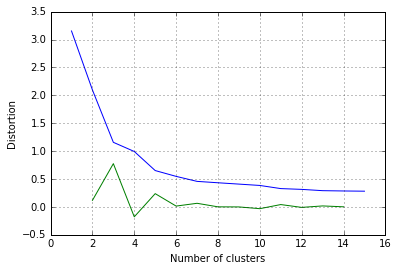

Ideal number of clusters by elbow methode =  3


In [19]:
last = Z[-15:, 2]
last_rev = last[::-1]
idxs = np.arange(1, len(last) + 1)
plt.plot(idxs, last_rev)
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
acceleration = np.diff(last, 2)  # 2nd derivative of the distances
acceleration_rev = acceleration[::-1]
plt.plot(idxs[:-2] + 1, acceleration_rev)
plt.grid(True)
plt.show()
k = acceleration_rev.argmax() + 2  # if idx 0 is the max of this we want 2 clusters
print "Ideal number of clusters by elbow methode = ", k

<font color='red'> Captions lacking. What is the elbow method? (I like to learn about it!) What does it allow you to do? Explain, explain, explain!</font>

Posibility to change k manually:
--------------------------------

In [35]:
from scipy.cluster.hierarchy import fcluster
k=k
clusters = fcluster(Z, k, criterion='maxclust')
print "Used value for k = ", k

Used value for k =  3


Plotting the clustered data:
----------------------------


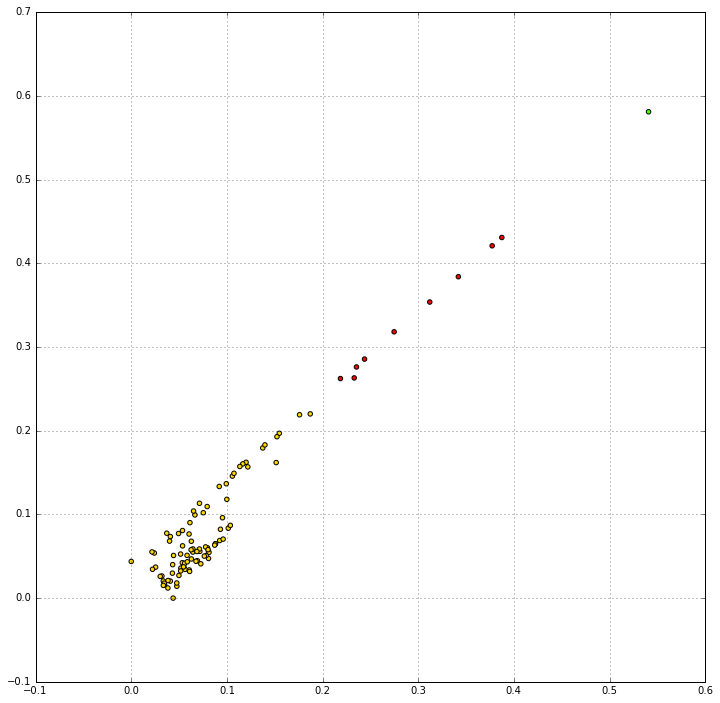

In [21]:
plt.figure(figsize=(12,12))
plt.scatter(X[:,0], X[:,1], c=clusters, cmap = 'prism')
plt.grid(True)
plt.show()

<font color='red'>  ERON: Axes, Captions and text lacking! </font>

In [22]:
dirList = getDirList(False)
print dirList[52]

icedrop


<font color='red'> Please mention that you precalculated the data matrix in another notebook!</font>

Rubric and Grade:
    
<table border="1">
<tr><th></th><th>Weight</th><th>Insufficient (4)</th><th>Fair (6)</th><th>Good (8)</th><th>Excellent (10)</th></tr>
<tr>
<td>Text Quality</td><td>0.2</td><td></td><td>Texts are present, but incomplete.</td><td>Texts are present and complete</td><td>Texts are present and complete and show mastery of the subject matter.</td>
</tr>
<tr><th></th><th>Score</th><th> Absent </th><th> </th><th> </th><th> </th></tr>
<tr>
<td>Figures</td><td>0.2</td><td></td><td>4 out of 4 requested figures are present.</td><td>4 out of 4 requested figures are present with clear captions and axes.</td><td>4 out of 4 requested figures are present with clear captions and axes. There is a clear relation with the preceding and/or following comments.</td>
</tr>
<tr><th></th><th>Score</th><th> </th><th>Present </th><th> </th><th> </th></tr>
<tr>
<td>Clustering Code</td><td>0.6</td><td></td><td>Clustering algorithms have been called with correct data, and the outcome is discussed.</td><td>Clustering algorithms have been called with correct data, the outcome is discussed and compared with outcomes of other methods used by fellow students.</td><td>Clustering algorithms have been called with correct data, the outcome is and compared with outcome other methods used by feloow students. Applicability of the clustering method to the SensorCity challenge is evaluated, and a convincing choice of method for the SensorCity challenge is presented.</td>
</tr>
<tr><th></th><th>Score</th><th>Discussion is missing </th><th> </th><th> </th><th> </th></tr>
</table>
    

In [2]:
Score=0.6*4+0.2*4+0.2*6
print Score

4.4
